<a href="https://colab.research.google.com/github/7Meghana/pythonbasics/blob/main/svm_test_train_data_as17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#SVM Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
test_data = pd.read_csv("SalaryData_Test.csv")
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
train_data = pd.read_csv("SalaryData_Train.csv")
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
train_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
test_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
train_data.dropna(inplace = True)

In [ ]:
train_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Drop the original 'Taxable.Income' column
train_data.drop(columns=['education','workclass','maritalstatus','occupation','relationship','race','sex','native'], axis = 1,inplace=True)

In [ ]:
train_data.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,39,13,2174,0,40,<=50K
1,50,13,0,0,13,<=50K
2,38,9,0,0,40,<=50K
3,53,7,0,0,40,<=50K
4,28,13,0,0,40,<=50K


In [ ]:
train_data['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
train_data['Salary'] = LabelEncoder().fit_transform(train_data['Salary'])

In [ ]:
train_data.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,39,13,2174,0,40,0
1,50,13,0,0,13,0
2,38,9,0,0,40,0
3,53,7,0,0,40,0
4,28,13,0,0,40,0


In [ ]:
# Drop the original 'Taxable.Income' column
test_data.drop(columns=['education','workclass','occupation','maritalstatus','relationship','race','sex','native'], axis = 1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
test_data['Salary'] = LabelEncoder().fit_transform(test_data['Salary'])

In [ ]:
test_data.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,25,7,0,0,40,0
1,38,9,0,0,50,0
2,28,12,0,0,40,1
3,44,10,7688,0,40,1
4,34,6,0,0,30,0


<ipython-input-45-1347ecfedb08>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x="Salary",data=train_data,palette="hls")


<Axes: xlabel='Salary', ylabel='count'>

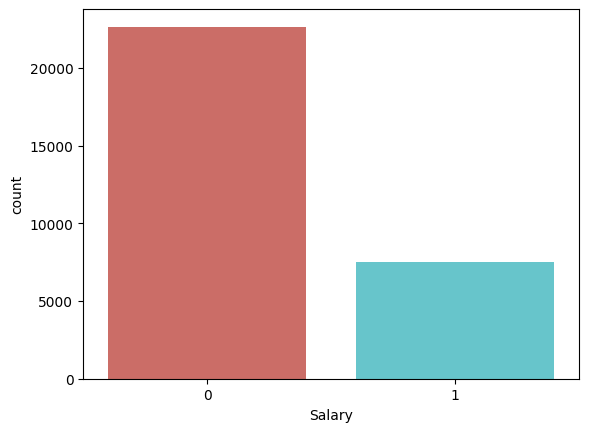

In [ ]:
import seaborn as sb
sb.countplot(x="Salary",data=train_data,palette="hls")

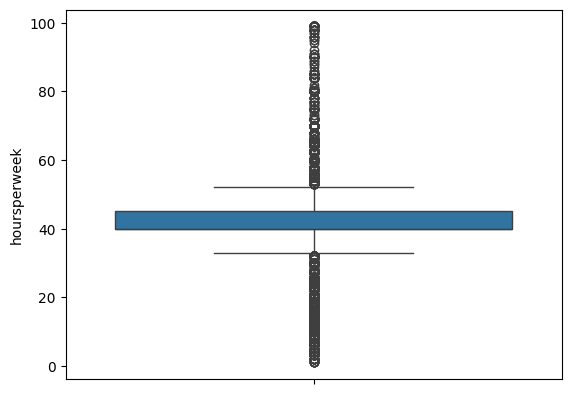

In [ ]:
import matplotlib.pyplot as plt

sb.boxplot(data=train_data['hoursperweek'])
plt.show()

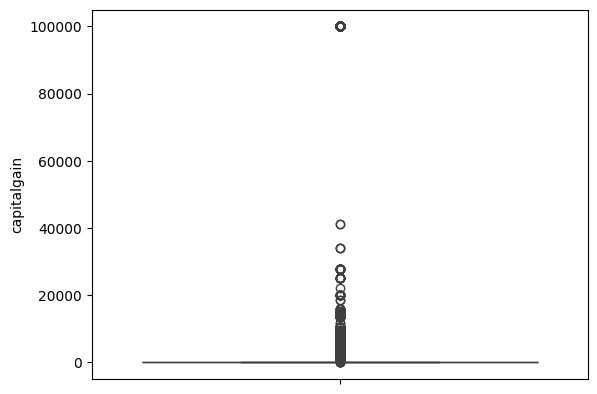

In [ ]:
sb.boxplot(data=train_data['capitalgain'])
plt.show()

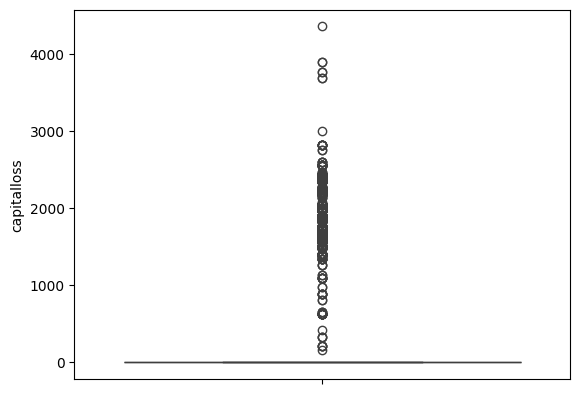

In [ ]:
sb.boxplot(data=train_data['capitalloss'])
plt.show()

In [ ]:
# Split data into features and target variable
X_train = train_data.drop(columns=['Salary'])
y_train =train_data['Salary']

In [ ]:
# Split data into features and target variable
X_test = test_data.drop(columns=['Salary'])
y_test =test_data['Salary']

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30161, 5), (30161,), (15060, 5), (15060,))

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.5,1],'C':[10,0.1,1] }]
gsv = GridSearchCV(clf,param_grid,cv=2)
gsv.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 1], 'gamma': [0.5, 1],
                          'kernel': ['rbf']}])

In [ ]:
gsv.best_params_ , gsv.best_score_

({'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7822685020781678)

In [ ]:
clf = SVC(C= 1, gamma = 0.5)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 79.8605577689243


array([[10795,   565],
       [ 2468,  1232]])

In [ ]:
clf = SVC(kernel= "sigmoid")
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 75.67729083665338


array([[10553,   807],
       [ 2856,   844]])